<a href="https://colab.research.google.com/github/atikahlestar/Data-Science/blob/main/Project_1_Predicting_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1

Memprediksi Probabilitas Churn Pelanggan Berdasarkan Perilaku historis di Perusahaan Telekomunikasi

### Telco Churn Dataset
Dataset ini berisi tentang info pelanggan di perusahaan Telco untuk memprediksi apakah mereka akan melakukan churn atau tidak

### Sumber Data
https://www.kaggle.com/datasets/blastchar/telco-customer-churn


### Masalah Bisnis
    Bagaimana cara mengurangi tingkat churn di perusahaan Telco dengan memprediksi probabilitas churn pelanggan?

### Tujuan
    Buatlah model klasifikasi untuk memprediksi probabilitas churn.

### Data Cleansing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/Shared drives/atikahlestari31/Project/Dataset/Telco-Customer-Churn.csv'

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
## Check Missing Values

In [7]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
## Check Outliers

In [9]:
df_num = df.select_dtypes(["int64","float64"])
col_num = df_num.columns
col_num

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [10]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print(iqr)
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for SeniorCitizen
0.0
(1142, 21)
Running for tenure
46.0
(0, 21)
Running for MonthlyCharges
54.349999999999994
(0, 21)


In [11]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    df = df[(df[col] >= fence_low) & (df[col] <= fence_high)]

Running for SeniorCitizen
Running for tenure
Running for MonthlyCharges


In [12]:
df.shape

(5901, 21)

In [13]:
## Check Duplicates

In [14]:
df.duplicated().sum()

0

In [15]:
df_clean = df.copy()
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EDA

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5901 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5901 non-null   object 
 1   gender            5901 non-null   object 
 2   SeniorCitizen     5901 non-null   int64  
 3   Partner           5901 non-null   object 
 4   Dependents        5901 non-null   object 
 5   tenure            5901 non-null   int64  
 6   PhoneService      5901 non-null   object 
 7   MultipleLines     5901 non-null   object 
 8   InternetService   5901 non-null   object 
 9   OnlineSecurity    5901 non-null   object 
 10  OnlineBackup      5901 non-null   object 
 11  DeviceProtection  5901 non-null   object 
 12  TechSupport       5901 non-null   object 
 13  StreamingTV       5901 non-null   object 
 14  StreamingMovies   5901 non-null   object 
 15  Contract          5901 non-null   object 
 16  PaperlessBilling  5901 non-null   object 
 17  

In [17]:
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df_clean = df_clean[~(df_clean["TotalCharges"] == " ")]
df_clean["TotalCharges"] = df_clean["TotalCharges"].astype("float64")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5890 non-null   object 
 1   gender            5890 non-null   object 
 2   SeniorCitizen     5890 non-null   int64  
 3   Partner           5890 non-null   object 
 4   Dependents        5890 non-null   object 
 5   tenure            5890 non-null   int64  
 6   PhoneService      5890 non-null   object 
 7   MultipleLines     5890 non-null   object 
 8   InternetService   5890 non-null   object 
 9   OnlineSecurity    5890 non-null   object 
 10  OnlineBackup      5890 non-null   object 
 11  DeviceProtection  5890 non-null   object 
 12  TechSupport       5890 non-null   object 
 13  StreamingTV       5890 non-null   object 
 14  StreamingMovies   5890 non-null   object 
 15  Contract          5890 non-null   object 
 16  PaperlessBilling  5890 non-null   object 
 17  

<ipython-input-18-fbf3ce138ff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["TotalCharges"] = df_clean["TotalCharges"].astype("float64")


In [19]:
## Univariate Analysis

In [20]:
df_num = df_clean.select_dtypes(["int64", "float64"])
num_col = df_num.columns
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [21]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5890.0,5890.000000,5890.000000,5890.000000
mean,0.0,32.252292,61.885594,2181.089550
std,0.0,24.612263,30.315567,2233.217848
min,0.0,1.000000,18.250000,18.800000
25%,0.0,9.000000,25.600000,365.575000
50%,0.0,28.000000,65.875000,1295.775000
75%,0.0,55.000000,86.787500,3566.362500
max,0.0,72.000000,118.750000,8684.800000


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

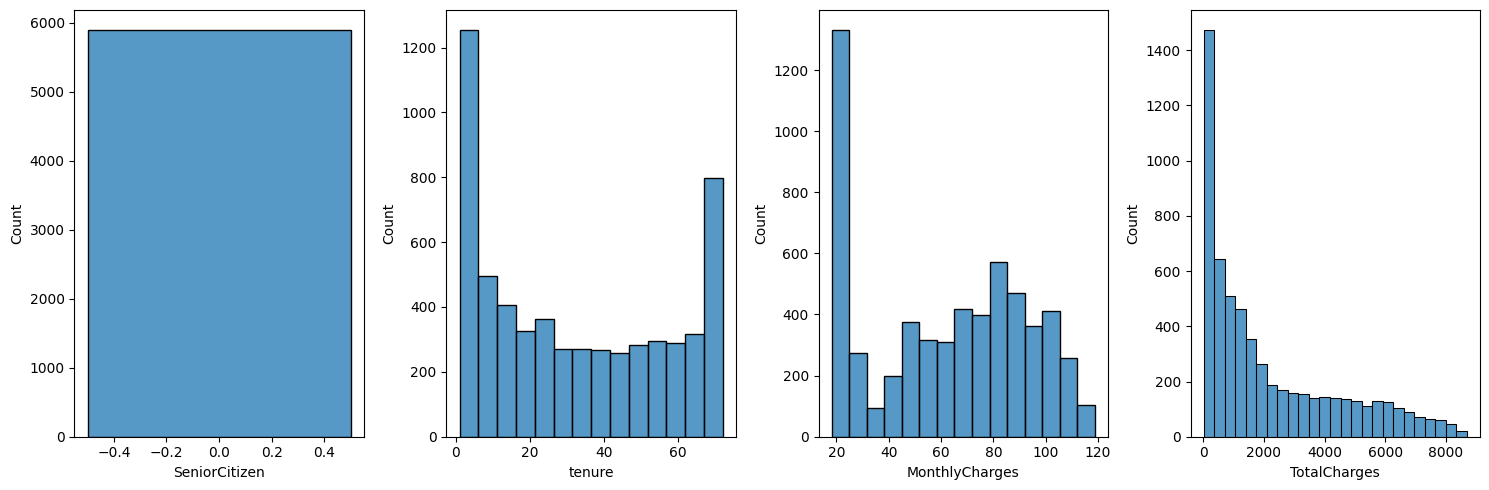

In [23]:
plt.figure(figsize = [15,5])
for i in range(len(num_col)):
    plt.subplot(1,4, i+1)
    sns.histplot(x = num_col[i], data = df_clean)
    plt.tight_layout()

In [24]:
## Multivariate Analysis

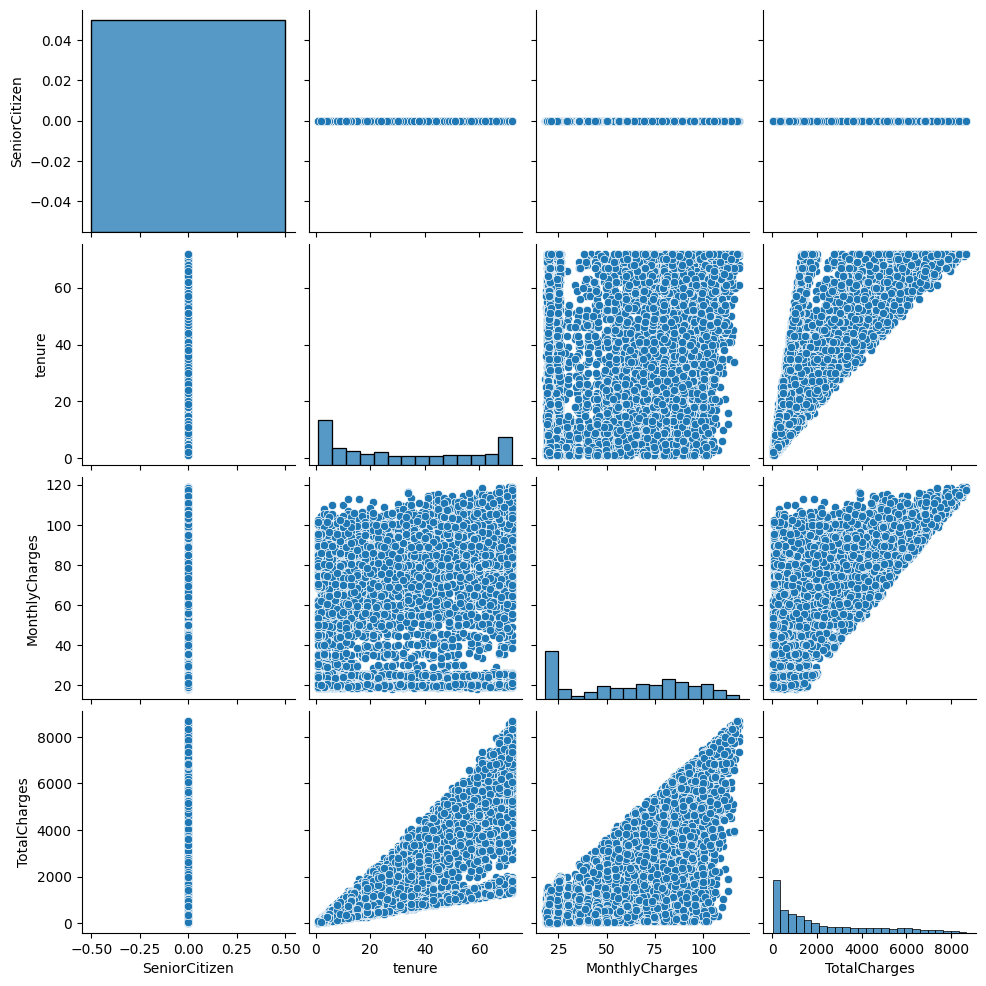

In [25]:
sns.pairplot(df_clean[num_col])

<Axes: >

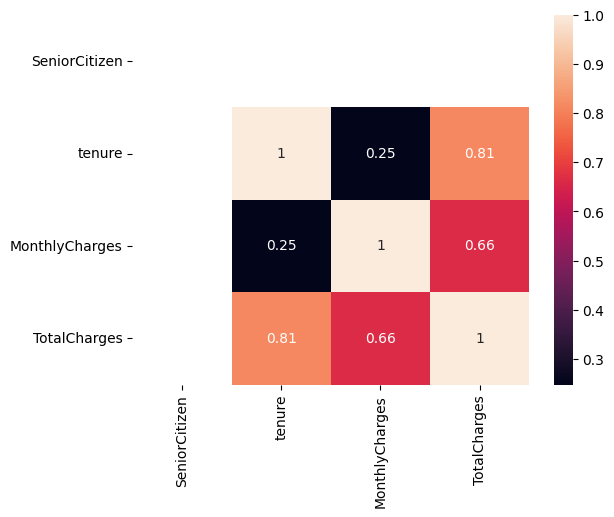

In [26]:
sns.heatmap(df_clean[num_col].corr(), annot=True)

### Additional Data Preparation before Modeling

In [27]:
## Feature Engineering

In [28]:
df_clean["TotalCharges_per_tenure"] = df_clean["TotalCharges"] / df_clean["tenure"]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               5890 non-null   object 
 1   gender                   5890 non-null   object 
 2   SeniorCitizen            5890 non-null   int64  
 3   Partner                  5890 non-null   object 
 4   Dependents               5890 non-null   object 
 5   tenure                   5890 non-null   int64  
 6   PhoneService             5890 non-null   object 
 7   MultipleLines            5890 non-null   object 
 8   InternetService          5890 non-null   object 
 9   OnlineSecurity           5890 non-null   object 
 10  OnlineBackup             5890 non-null   object 
 11  DeviceProtection         5890 non-null   object 
 12  TechSupport              5890 non-null   object 
 13  StreamingTV              5890 non-null   object 
 14  StreamingMovies          5890

In [29]:
## One Hot Ending

In [30]:
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000


In [31]:
df_clean = df_clean.drop(columns = ["customerID"])

In [32]:
string_df = df_clean.select_dtypes(["object"])
string_col = string_df.columns.tolist()
string_col.remove("Churn")

In [33]:
df_final = pd.get_dummies(df_clean, columns = string_col)

In [34]:
df_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,29.850000,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,No,55.573529,False,True,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,54.075000,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,No,40.905556,False,True,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,Yes,75.825000,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5890 non-null   int64  
 1   tenure                                   5890 non-null   int64  
 2   MonthlyCharges                           5890 non-null   float64
 3   TotalCharges                             5890 non-null   float64
 4   Churn                                    5890 non-null   object 
 5   TotalCharges_per_tenure                  5890 non-null   float64
 6   gender_Female                            5890 non-null   bool   
 7   gender_Male                              5890 non-null   bool   
 8   Partner_No                               5890 non-null   bool   
 9   Partner_Yes                              5890 non-null   bool   
 10  Dependents_No                            5890 non-nul

In [36]:
## Train Test Split

In [37]:
X = df_final.drop(columns = ["Churn"])
y = df_final["Churn"].map({"No" : 0, "Yes" : 1})

In [38]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalCharges_per_tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,29.850000,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,55.573529,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,54.075000,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,40.905556,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,75.825000,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,72,21.15,1419.40,19.713889,True,False,True,False,True,...,False,False,False,True,False,True,True,False,False,False
7038,0,24,84.80,1990.50,82.937500,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.90,102.262500,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,31.495455,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [39]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7037,0
7038,0
7039,0
7040,0


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4123, 46)
(1767, 46)
(4123,)
(1767,)


### Modeling

In [42]:
## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
## Hyperparameter Tuning
params = {
    "max_depth" : [2,3,4,5,7,10,15],
    "min_samples_leaf" : [10,15,25,50,100]
}



In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = params,
                           cv = 10,
                           scoring = "roc_auc"
                          )

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 7, 10, 15],
                         'min_samples_leaf': [10, 15, 25, 50, 100]},
             scoring='roc_auc')

In [49]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=10)

### Evaluation

In [50]:
from sklearn.metrics import recall_score

y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_rf_best = rf_best.predict(X_test)

In [51]:
print(recall_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf_best, pos_label = 1, average = "binary"))

0.5012594458438288
0.47858942065491183
0.4080604534005038


In [52]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf_best, pos_label = 1, average = "binary"))


0.46386946386946387
0.6484641638225256
0.6835443037974683


In [53]:
from sklearn.metrics import roc_auc_score

y_prob_dtree = dtree.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_rf_best = rf_best.predict_proba(X_test)[:,1]


In [54]:
print(roc_auc_score(y_test, y_prob_dtree))
print(roc_auc_score(y_test, y_prob_rf))
print(roc_auc_score(y_test, y_prob_rf_best))

0.6663240728823843
0.8317803232271231
0.8655206015922338


### Kesimpulan Bisnis

#### Dampak Bisnis


In [55]:
## Final model : Decision Tree
## Recall = 50 %, Precision = 47%

# Asumsi untuk setiap 100 pelanggan, churned = 20

# Sebelum menggunakan model:
# Biaya: 100 * 50K = 5 juta
# Pendapatan = 80 * 100K = 8 juta

# Setelah menggunakan model:
# Biaya = Pelanggan yang berhenti / Precision * 50K
#       = 20 / 0.47 * 50K
#       = 43 * 50K = 2.15 juta
# Pendapatan = (80 + Recall * Pelanggan yang berhenti) * 100K
#           = (80 + 0.50 * 20) * 100K
#           = 90 * 100K = 9 juta
